# Entendimiento inicial de los datos

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

c:\Users\carlo\anaconda3\envs\AppliedDataScience\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
data  = pd.read_csv("..\data\hotel_bookings_modified.csv")

C:\Users\carlo\AppData\Local\Temp\ipykernel_23332\2855414219.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv("..\data\hotel_bookings_modified.csv")


In [9]:
data.shape

(58895, 33)

In [10]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [11]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,...,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.0,July,27,1,0,1,1,...,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,...,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN


### Inicialmente se analizaran los posibles valores que pueden tomar las columnas de "kids" y "company" y se nota que la mayoria de los registros tienen estas columnas vacias, por lo que podria considerarse que no es muy influyente al momento de realizar una reserva

In [59]:
data['kids'].isna().sum()

np.int64(58694)

In [62]:
data['kids'].value_counts()

kids
-1.0      105
 62.0       6
 58.0       5
 60.0       5
 57.0       5
 63.0       5
 98.0       3
 82.0       3
 95.0       3
 59.0       3
 85.0       3
 53.0       3
 84.0       3
 61.0       3
 86.0       3
 96.0       3
 65.0       3
 100.0      3
 97.0       3
 80.0       3
 64.0       2
 81.0       2
 52.0       2
 70.0       2
 89.0       2
 76.0       2
 56.0       2
 87.0       1
 92.0       1
 67.0       1
 55.0       1
 78.0       1
 83.0       1
 88.0       1
 69.0       1
 73.0       1
 77.0       1
 74.0       1
 93.0       1
 54.0       1
 72.0       1
Name: count, dtype: int64

In [61]:
data['company'].value_counts()

company
223.0    784
281.0    138
154.0    133
405.0    100
94.0      87
        ... 
186        1
331        1
93         1
316        1
NU         1
Name: count, Length: 277, dtype: int64

In [72]:
print( "Values: ", data['hotel'].value_counts())

print( "Percent: ", data['hotel'].value_counts(normalize=True) * 100)

Values:  hotel
Resort Hotel    40063
City Hotel      18832
Name: count, dtype: int64
Percent:  hotel
Resort Hotel    68.02445
City Hotel      31.97555
Name: proportion, dtype: float64


In [73]:
print( "Values: ", data['is_canceled'].value_counts())

print( "Percent: ", data['is_canceled'].value_counts(normalize=True) * 100)

Values:  is_canceled
0    34666
1    24229
Name: count, dtype: int64
Percent:  is_canceled
0    58.860684
1    41.139316
Name: proportion, dtype: float64


#### De lo anterior se evidencia que la mayoria de las reservas se realizan para Resorts, siendo estas el 68% de los datos y que el 41% de los datos, son registros de reservas canceladas

In [66]:
canceled = data[data['is_canceled'] == 1]
canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
8,Resort Hotel,1,85,2015.0,July,27,1,0,3,2,...,240.0,NaN,0.0,Transient,82.0,0.0,1.0,Canceled,2015-05-06,NaN
9,Resort Hotel,1,75,2015.0,July,27,1,0,3,2,...,15.0,NaN,0.0,Transient,105.5,0.0,0.0,Canceled,2015-04-22,NaN
10,Resort Hotel,1,23,2015.0,July,27,1,0,4,2,...,240.0,NaN,0.0,Transient,123.0,0.0,0.0,Canceled,2015-06-23,NaN
27,Resort Hotel,1,60,2015.0,July,27,1,2,5,2,...,240.0,NaN,0.0,Transient,107.0,0.0,2.0,Canceled,2015-05-11,NaN
32,Resort Hotel,1,96,2015.0,July,27,1,2,8,2,...,NaN,NaN,0.0,Transient,108.3,0.0,2.0,Canceled,2015-05-29,NaN


In [67]:
canceled['hotel'].value_counts()

hotel
City Hotel      13105
Resort Hotel    11124
Name: count, dtype: int64

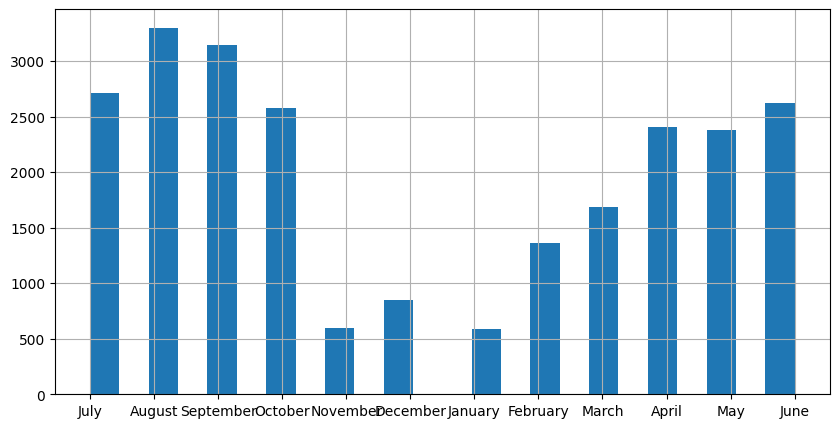

In [78]:
canceled["arrival_date_month"].hist(bins=24, figsize=(10,5))
plt.show()